## Import dataset

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

## Exploring the dataset

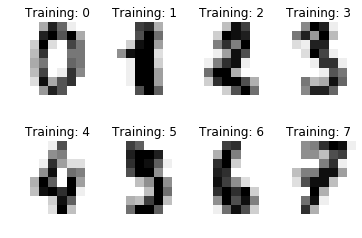

In [136]:
# The data that we are interested in is made of 8x8 images of digits
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

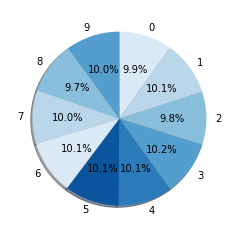

In [137]:
from itertools import groupby

sorted_targets = np.sort(digits.target)
frequencies = [len(list(group)) for key, group in groupby(sorted_targets)]
labels = np.unique(sorted_targets)

plt.pie(frequencies, labels=labels, colors=sn.color_palette("Blues"),
        counterclock=False, shadow=True, 
        startangle=90, autopct='%.1f%%')
plt.show()

## Format for learning

In [138]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, 
                                                    test_size=0.33, random_state=10)

## Train a classifier

In [139]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)

# Now predict the value of the training digits
expected = y_test
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.97      1.00      0.98        64
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        61
           4       1.00      0.98      0.99        56
           5       1.00      0.98      0.99        56
           6       1.00      0.98      0.99        58
           7       0.99      1.00      0.99        67
           8       0.98      0.96      0.97        56
           9       0.96      0.98      0.97        56

   micro avg       0.99      0.99      0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99 

The f1-score gives you the harmonic mean of precision and recall. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

The support is the number of samples of the true response that lie in that class.

## Results

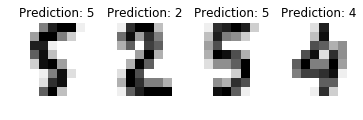

In [140]:
test_images = [x.reshape((8,8)) for x in X_test]
images_and_predictions = list(zip(test_images, predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

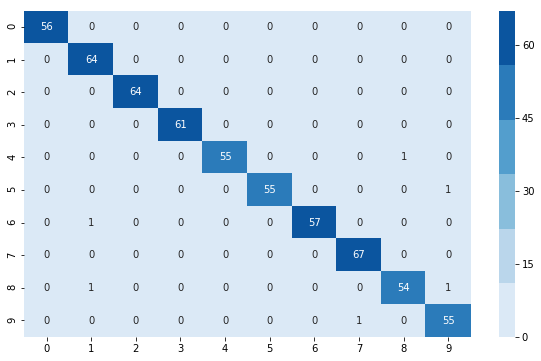

In [141]:
import seaborn as sn
plt.figure(figsize=(10,6))
cm = metrics.confusion_matrix(expected, predicted)
sn.heatmap(cm, annot=True, cmap=sn.color_palette("Blues"))

print()